# Depth First Search (깊이 우선 탐색)
* 그래프 순회 알고리즘 중 하나로 스택(Stack),재귀(Recursive), 백트래킹(Backtracking)으로 구현

## 그래프 정의
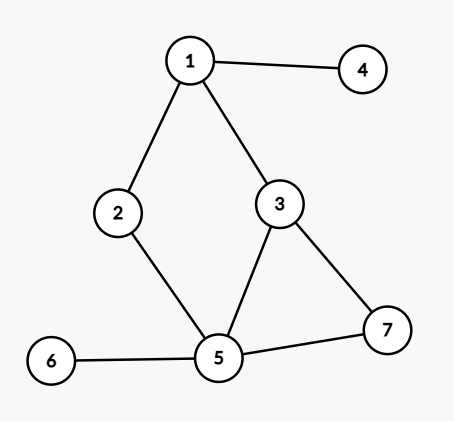

In [141]:
graph = {
    1: [2, 3, 4],
    2: [5],
    3: [5],
    4: [],
    5: [6, 7],
    6: [],
    7: [3]
}

## 재귀를 이용한 DFS

In [201]:
def recursive_DFS(graph, node, visited = []):
    visited.append(node)
    print('Visited : {}'.format(visited))
    print('CurNode : {} | {}'.format(node, graph[node]))
    
    if not graph[node]:
        print('## {} is end node ##'.format(node))
        
    for i in graph[node]:
        if i not in visited:
            print('> Go {} \n'.format(i))
            recursive_DFS(graph, i, visited)
        else:
            print('## {} already visited ##'.format(i))
    
    return visited

In [202]:
visited = []
recursive_DFS(graph, 1, visited)

Visited : [1]
CurNode : 1 | [2, 3, 4]
> Go 2 

Visited : [1, 2]
CurNode : 2 | [5]
> Go 5 

Visited : [1, 2, 5]
CurNode : 5 | [6, 7]
> Go 6 

Visited : [1, 2, 5, 6]
CurNode : 6 | []
## 6 is end node ##
> Go 7 

Visited : [1, 2, 5, 6, 7]
CurNode : 7 | [3]
> Go 3 

Visited : [1, 2, 5, 6, 7, 3]
CurNode : 3 | [5]
## 5 already visited ##
## 3 already visited ##
> Go 4 

Visited : [1, 2, 5, 6, 7, 3, 4]
CurNode : 4 | []
## 4 is end node ##


[1, 2, 5, 6, 7, 3, 4]

## 스택을 이용한 DFS
* 스택 DFS는 재귀 DFS와 다른 결과를 나타냄
* 재귀 DFS는 특정 노드와 연결된 노드들의 순서에 따라 방문하지만, 스택 DFS는 삽입된 노드의 역순으로 방문하기 때문에 결과가 다르게 나옴
* 예를 들어, 1번 노드와 연결된 `[2, 3, 4]`는 재귀 DFS에서 `2 -> 3 -> 4` 순서로 방문하지만, 스택 DFS에서는 `4 -> 3 -> 2` 순서로 방문

In [199]:
def stacked_DFS(graph, node):
    visited = []
    stack = [node]

    while stack:
        cur_node = stack.pop()
        print('## Pop node {} ##'.format(cur_node))

        if cur_node not in visited:
            visited.append(cur_node)
                
            if graph[cur_node]:
                for n in graph[cur_node]:
                    stack.append(n)
                print('Current Node : {}'.format(node))
                print('Stack   : {}'.format(stack))
                    
            else:
                print('## {} is end node ##'.format(cur_node))
                
        print('Visited : {} \n'.format(visited))   
                
    return visited


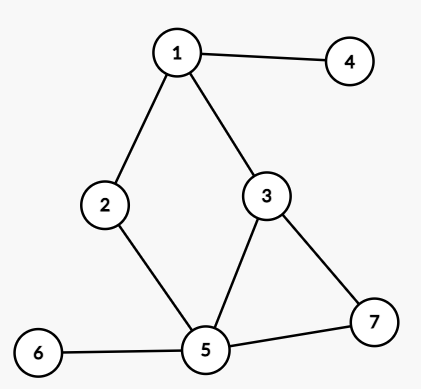

In [200]:
stacked_DFS(graph, 1)

## Pop node 1 ##
Current Node : 1
Stack   : [2, 3, 4]
Visited : [1] 

## Pop node 4 ##
## 4 is end node ##
Visited : [1, 4] 

## Pop node 3 ##
Current Node : 1
Stack   : [2, 5]
Visited : [1, 4, 3] 

## Pop node 5 ##
Current Node : 1
Stack   : [2, 6, 7]
Visited : [1, 4, 3, 5] 

## Pop node 7 ##
Current Node : 1
Stack   : [2, 6, 3]
Visited : [1, 4, 3, 5, 7] 

## Pop node 3 ##
Visited : [1, 4, 3, 5, 7] 

## Pop node 6 ##
## 6 is end node ##
Visited : [1, 4, 3, 5, 7, 6] 

## Pop node 2 ##
Current Node : 1
Stack   : [5]
Visited : [1, 4, 3, 5, 7, 6, 2] 

## Pop node 5 ##
Visited : [1, 4, 3, 5, 7, 6, 2] 



[1, 4, 3, 5, 7, 6, 2]

## 응용 문제 #1-1

### 문제
`N * M` 크기의 얼음틀이 있다. 구멍이 뚫려있는 부분은 0, 칸막이가 존재하는 부분은 1로 표시된다. 구멍이 뚫려 있는 부분끼리 상, 하, 좌, 우로 붙어 있는 경우 서로 연결되어 있는 것으로 간주한다. 이때 얼음 틀의 모양이 주어졌을 때 생성되는 총 아이스크림의 개수를 구하는 프로그램을 작성하시오. 다음의 4 X 5 얼음 틀 예시에서는 아이스크림이 총 3개 생성된다.

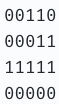

### 입력
첫 번째 줄에 얼음 틀의 새로 길이 N과 가로 길이 M이 주어진다.( 1<=N, M <= 1000)
두 번째 줄부터 N+1번째 줄까지 얼음 틀의 형태가 주어진다.
이때 구멍이 뚫여있는 부분은 0, 그렇지 않은 부분은 1이다.

### 출력
한 번에 만들 수 있는 아이스크림 개수를 출력한다.

In [362]:
size = [4, 5]
matrix = [
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0]
]

In [363]:
def dfs(graph, x, y, size):
    if x < 0 or x >= size[0] or y < 0 or y >= size[1]:
        return False
    
    if graph[x][y] == 0:
        graph[x][y] = 1

        dfs(graph, x-1, y, size)
        dfs(graph, x+1, y, size)
        dfs(graph, x, y-1, size)
        dfs(graph, x, y+1, size)
        return True
    
    return False

In [364]:
def solution(graph, size):
    cnt = 0
    for i in range(size[0]):
        for j in range(size[1]):
            if dfs(graph, i, j, size) == True:
                cnt += 1
    return cnt

In [365]:
solution(matrix, size)

3

## 응용 문제 #1-2
* 위의 음료수 얼려 먹기 문제에서, 가장 큰 크기를 가지는 아이스크림의 면적을 출력

In [804]:
size = [4, 5]
matrix = [
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

In [805]:
def dfs(graph, x, y, size):
    cnt = 0
    if x < 0 or x >= size[0] or y < 0 or y >= size[1]:
        return cnt
    
    if graph[x][y] == 0:
        graph[x][y] = 1
        cnt += 1
        
        cnt += dfs(graph, x-1, y, size)
        cnt += dfs(graph, x+1, y, size)
        cnt += dfs(graph, x, y-1, size)
        cnt += dfs(graph, x, y+1, size)

    return cnt

In [806]:
def solution(graph, size):
    cnt = []
    for i in range(size[0]):
        for j in range(size[1]):
            cnt.append(dfs(graph, i, j, size))
    return max(cnt)

In [807]:
solution(matrix, size)

6